# STEP3 TA IndéMode  データ加工 商圏サロン年間利用額

pip install pandas

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt #グラフ描画ライブラリ
import japanize_matplotlib # matplotlib日本語化対応ライブラリ

In [2]:
# SQLiteデータベース接続
conn = sqlite3.connect('STEP3チーム課題_TA_IndéMode_DB.db')

# SQLクエリを実行してデータフレームに読み込む
query1 = 'SELECT * FROM "商圏人口構成";'  
df1 = pd.read_sql_query(query1, conn)
query2 = 'SELECT * FROM "サロン利用実態";'  
df2 = pd.read_sql_query(query2, conn)

# データベース接続を閉じる
conn.close()

#display(df1)
#display(df2)

# df1加工
df1['20代'] = df1['20～24 歳'].astype(int) + df1['25～29 歳'].astype(int)
df1['30代'] = df1['30～34 歳'].astype(int) + df1['35～39 歳'].astype(int)
df1['40代'] = df1['40～44 歳'].astype(int) + df1['45～49 歳'].astype(int)
df1['50代'] = df1['50～54 歳'].astype(int) + df1['55～59 歳'].astype(int)
df1['60代'] = df1['60～64 歳'].astype(int) + df1['65～69 歳'].astype(int)
del df1['4 歳以下']  #列を削除
del df1['5～9 歳']  
del df1['10～14 歳'] 
del df1['20～24 歳'] 
del df1['25～29 歳'] 
del df1['30～34 歳'] 
del df1['35～39 歳'] 
del df1['40～44 歳'] 
del df1['45～49 歳'] 
del df1['50～54 歳'] 
del df1['55～59 歳']
del df1['60～64 歳'] 
del df1['65～69 歳']  
del df1['75 歳以上']  
#display(df1)

df1['男性比率'] = df1['男性人口'].astype(float) / df1['総人口'].astype(float)
df1['女性比率'] = df1['女性人口'].astype(float) / df1['総人口'].astype(float)
del df1['総人口']  
del df1['男性人口']  
del df1['女性人口']  
#display(df1)

df1['15-19歳男性'] =   df1['15～19 歳'].astype(float) * df1['男性比率'].astype(float)
df1['20代男性'] =   df1['20代'].astype(float) * df1['男性比率'].astype(float)
df1['30代男性'] =   df1['30代'].astype(float) * df1['男性比率'].astype(float)
df1['40代男性'] =   df1['40代'].astype(float) * df1['男性比率'].astype(float)
df1['50代男性'] =   df1['50代'].astype(float) * df1['男性比率'].astype(float)
df1['60代男性'] =   df1['60代'].astype(float) * df1['男性比率'].astype(float)
df1['70-74歳男性'] =   df1['70～74 歳'].astype(float) * df1['男性比率'].astype(float)
df1['15-19歳女性'] =   df1['15～19 歳'].astype(float) * df1['女性比率'].astype(float)
df1['20代女性'] =   df1['20代'].astype(float) * df1['女性比率'].astype(float)
df1['30代女性'] =   df1['30代'].astype(float) * df1['女性比率'].astype(float)
df1['40代女性'] =   df1['40代'].astype(float) * df1['女性比率'].astype(float)
df1['50代女性'] =   df1['50代'].astype(float) * df1['女性比率'].astype(float)
df1['60代女性'] =   df1['60代'].astype(float) * df1['女性比率'].astype(float)
df1['70-74歳女性'] =   df1['70～74 歳'].astype(float) * df1['女性比率'].astype(float)
del df1['15～19 歳'] 
del df1['20代'] 
del df1['30代'] 
del df1['40代'] 
del df1['50代'] 
del df1['60代'] 
del df1['70～74 歳'] 
del df1['男性比率'] 
del df1['女性比率'] 
#display(df1)

# 項目を抜き取る
df1_item = df1['項目']
df2_item = df2['項目']
del df1['項目']
del df2['項目']
#display(df1_item)
#display(df2_item)

# 行同士を掛け合わせる
result0 = df1.iloc[0] * df2.iloc[2] / 10000000
result1 = df1.iloc[1] * df2.iloc[2] / 10000000
result2 = df1.iloc[2] * df2.iloc[2] / 10000000
result3 = df1.iloc[3] * df2.iloc[2] / 10000000
result4 = df1.iloc[4] * df2.iloc[2] / 10000000

# 列方向に結合
result = pd.concat([pd.DataFrame(result0), pd.DataFrame(result1), pd.DataFrame(result2), pd.DataFrame(result3), pd.DataFrame(result4)], axis=1)
#display(result)

# 行と列を反転
result = result.T

# インデックスリセット
result = result.set_index(df1_item)
#display(result)

# 年間総額追加
result['総額(千万円/年)'] = result.sum(axis=1)

# 指定した列をデータフレームの先頭に移動
target_column = '総額(千万円/年)'
if target_column in result:
    columns = ['総額(千万円/年)'] + [col for col in result if col != '総額(千万円/年)']
    result = result[columns]
    
display(result.head(2))

,総額(千万円/年),15-19歳男性,20代男性,30代男性,40代男性,50代男性,60代男性,70-74歳男性,15-19歳女性,20代女性,30代女性,40代女性,50代女性,60代女性,70-74歳女性
項目,,,,,,,,,,,,,,,
500m圏,1.112532,0.007508,0.043057,0.067188,0.040574,0.032032,0.011010,0.001629,0.013643,0.124720,0.230448,0.200057,0.184222,0.103435,0.053009
1000m圏,10.007418,0.102287,0.430680,0.540926,0.388786,0.296790,0.103802,0.014754,0.180578,1.211985,1.802450,1.862360,1.658255,0.947429,0.466335


In [3]:
# SQLでDBにデータ保存
# SQLiteデータベースへの接続
db_path = "STEP3チーム課題_TA_IndéMode_DB.db"
conn = sqlite3.connect(db_path) 

# データフレームをSQLiteデータベースに書き込む
table_name = '商圏サロン利用金額'  # テーブル名を適切なものに変更してください
result.to_sql(table_name, conn, if_exists='replace', index=False)

print(db_path + ' への書き込みが完了しました')

STEP3チーム課題_TA_IndéMode_DB.db への書き込みが完了しました


> グラフ化

In [4]:
result_male = result[['15-19歳男性', '20代男性', '30代男性', '40代男性', '50代男性', '60代男性','70-74歳男性']]
#result_male['総額(千万円/年)'] = result_male.sum(axis=1)
#target_column = '総額(千万円/年)'
#if target_column in result_male:
#    columns = ['総額(千万円/年)'] + [col for col in result_male if col != '総額(千万円/年)']
#    result_male = result_male[columns]

result_female = result[['15-19歳女性', '20代女性', '30代女性', '40代女性', '50代女性', '60代女性','70-74歳女性']]
#result_female['総額(千万円/年)'] = result_female.sum(axis=1)
#target_column = '総額(千万円/年)'
#if target_column in result_female:
#    columns = ['総額(千万円/年)'] + [col for col in result_female if col != '総額(千万円/年)']
#    result_female = result_female[columns]

#display(result_male)
#display(result_female)


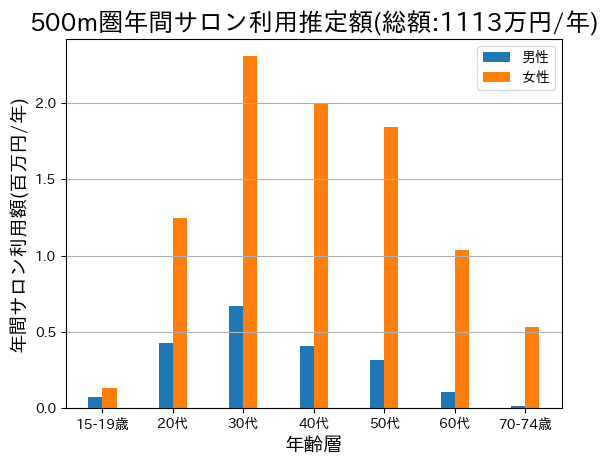

In [24]:
#棒グラフのX値を指定
x_male = [0.9, 1.9, 2.9, 3.9, 4.9, 5.9, 6.9]
x_female = [1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1]
x_label = [1, 2, 3, 4, 5, 6, 7]

#500m圏内
plt.title(df1_item[0]+ "年間サロン利用推定額(総額:" + str(int(round(result.loc[df1_item[0],'総額(千万円/年)']*1000,0))) + '万円/年)', fontsize = 18 )
plt.xlabel('年齢層', fontsize = 14 )
plt.ylabel('年間サロン利用額(百万円/年)', fontsize = 14 )
plt.bar(x_male, result_male.iloc[0] * 10 , width = 0.2, label = '男性')
plt.bar(x_female, result_female.iloc[0] * 10 , width = 0.2, label = '女性') 
plt.grid(axis='y') #y軸グリッド追加
plt.xticks(x_label, ['15-19歳','20代','30代','40代','50代','60代','70-74歳']) #x軸のx_label位置にラベル記入
plt.legend()

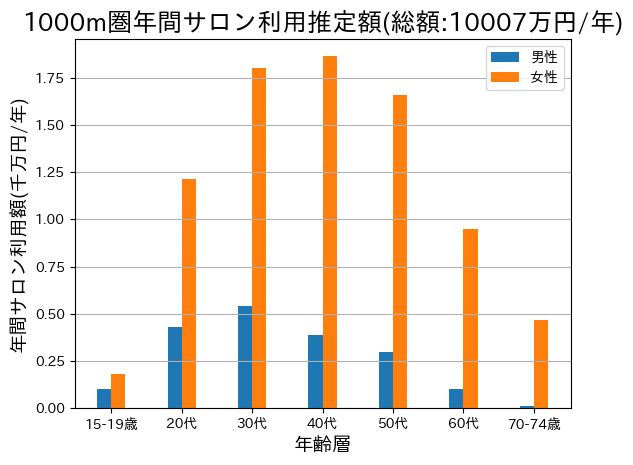

In [25]:
#1000m圏内
plt.title(df1_item[1]+ "年間サロン利用推定額(総額:" + str(int(round(result.loc[df1_item[1],'総額(千万円/年)']*1000,0))) + '万円/年)', fontsize = 18 )
plt.xlabel('年齢層', fontsize = 14 )
plt.ylabel('年間サロン利用額(千万円/年)', fontsize = 14 )
plt.bar(x_male, result_male.iloc[1], width = 0.2, label = '男性')
plt.bar(x_female, result_female.iloc[1], width = 0.2, label = '女性') 
plt.grid(axis='y') #y軸グリッド追加
plt.xticks(x_label, ['15-19歳','20代','30代','40代','50代','60代','70-74歳']) #x軸のx_label位置にラベル記入
plt.legend()

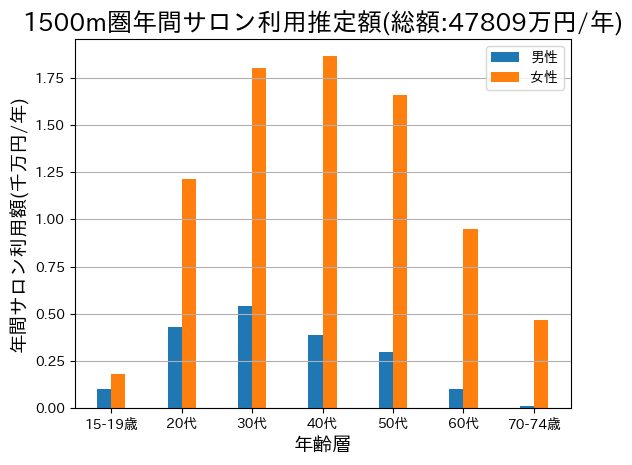

In [26]:
#1500m圏内
plt.title(df1_item[2]+ "年間サロン利用推定額(総額:" + str(int(round(result.loc[df1_item[2],'総額(千万円/年)']*1000,0))) + '万円/年)', fontsize = 18 )
plt.xlabel('年齢層', fontsize = 14 )
plt.ylabel('年間サロン利用額(千万円/年)', fontsize = 14 )
plt.bar(x_male, result_male.iloc[1], width = 0.2, label = '男性')
plt.bar(x_female, result_female.iloc[1], width = 0.2, label = '女性') 
plt.grid(axis='y') #y軸グリッド追加
plt.xticks(x_label, ['15-19歳','20代','30代','40代','50代','60代','70-74歳']) #x軸のx_label位置にラベル記入
plt.legend()